# COGS 108 - EDA Checkpoint

<!-- # Names -->
- Aasem Fituri
- Casey Hild
- Carlos van der Ley
- Jeremy Quinto

<a id='research_question'></a>
# Research Question

<!-- *Fill in your research question here* -->
Can we find a correlation between cancer rates and socioeconomic status?  More specifically, how does income, education, and employment status affect cancer rates across the United States?

# Setup

In [1]:
# Imports
# CoPilot was used for some assistance in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.formula.api as smf

data_cancer = pd.read_csv('data/cancer_reg.csv')
data_cancer.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


# Data Cleaning

Describe your data cleaning steps here.

In [2]:
# check shape, dtype, and visible null values by the outcome of the info() method
data_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

In [3]:
# check NA across the dataset
# True result matches with info() result above
data_cancer.isna().values.any()

True

In [4]:
# check which columns have NA
data_cancer.loc[:, data_cancer.isna().any()].count()

pctsomecol18_24             762
pctemployed16_over         2895
pctprivatecoveragealone    2438
dtype: int64

In [5]:
# We first begin by removing the columns that are not necessary for our analysis
data_cancer = data_cancer.drop(['studypercap', 'percentmarried', 'pctnohs18_24', 'pcths18_24', 
                  'pctsomecol18_24', 'pctbachdeg18_24', 'pctprivatecoveragealone', 'pctpubliccoveragealone', 'pctwhite',
                  'pctasian', 'pctblack', 'pctotherrace', 'pctmarriedhouseholds', 'birthrate'], axis=1)

In [6]:
data_cancer.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,medianage,medianagemale,medianagefemale,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctempprivcoverage,pctpubliccoverage
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,2895.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,45.272333,39.570725,42.145323,34.804660,13.282015,54.152642,7.852412,64.354939,41.196324,36.252642
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,45.304480,5.226017,5.292849,7.034924,5.394756,8.315064,3.452371,10.647057,9.447687,7.841741
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,22.300000,22.400000,22.300000,7.500000,2.500000,17.600000,0.400000,22.300000,13.500000,11.200000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,37.700000,36.350000,39.100000,30.400000,9.400000,48.600000,5.500000,57.200000,34.500000,30.900000
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,41.000000,39.600000,42.400000,35.300000,12.300000,54.500000,7.600000,65.100000,41.100000,36.300000
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,44.000000,42.500000,45.300000,39.650000,16.100000,60.300000,9.700000,72.100000,47.700000,41.550000
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,624.000000,64.700000,65.700000,54.800000,42.200000,80.100000,29.400000,92.300000,70.700000,65.100000


After looking at some of the descriptive statistics, we found that the max value for the variable medianage shows an unreasonable value.

In [7]:
# checking number of rows with medianage > 100
# medianage >= max (medianagemale, medianagefemale) 
data_cancer.loc[data_cancer.medianage > 100].shape[0]

30

In [8]:
data_cancer.loc[data_cancer.medianage > 100, ['medianage', 'medianagemale', 'medianagefemale']]

,medianage,medianagemale,medianagefemale
100,458.4,36.3,40.7
181,469.2,37.6,40.1
225,546.0,44.2,46.7
318,624.0,51.6,52.5
425,508.8,41.5,43.4
606,619.2,52.3,50.7
637,498.0,40.4,42.4
843,412.8,33.0,35.6
991,481.2,39.4,41.4
1199,424.8,34.2,36.8


There are 30 entries in the variable medianage with unreasonable values. Since these ages do not really make sense, and the number of entries with this erroneous data is small, we can simply drop those entries.

In [9]:
data_cancer = data_cancer.drop(data_cancer[data_cancer.medianage > 65.70].index)
data_cancer.shape

(3017, 19)

We will now split the geography column into two separate columns: County and State so that we can more easily group together entries within a certain region.

In [10]:
# Adding County, State columns from info in the 'geography' column
data_cancer[['County', 'State']] = data_cancer['geography'].str.split(',', n=1, expand=True)
data_cancer['State'] = data_cancer['State'].str.strip()

In [11]:
data_cancer['State'].nunique()

51

We first begin by splitting the geography column in separate county and state columns. This lets us easily group data points together into different regions as shown below. We have chosen to group the different states into the regions specified here: https://education.nationalgeographic.org/resource/united-states-regions/

In [12]:
# Assigning a Region to each County based on its state
West = ['California', 'Nevada', 'Hawaii', 'Alaska', 'Washington', 'Oregon', 'Idaho', 'Montana', 'Wyoming', 'Utah', 'Colorado']
SouthWest = ['Arizona', 'New Mexico', 'Texas', 'Oklahoma']
MidWest = ['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri', 'Wisconsin', 'Illinois', 'Indiana', 'Michigan', 'Ohio']
SouthEast = ['Kentucky', 'Arkansas', 'Louisiana', 'Mississippi', 'Tennessee', 'North Carolina', 'South Carolina', 'Georgia', 'Alabama', 'Florida', 'Virginia', 'West Virginia', 'District of Columbia', 'Delaware']
NorthEast = ['Maryland', 'Pennsylvania', 'New Jersey', 'New York', 'Connecticut', 'Rhode Island', 'Massachusetts', 'Vermont', 'New Hampshire', 'Maine']
# Length of all lists combines to 51 (Washington D.C is included)
assert(len(West) + len(SouthWest) + len(MidWest) + len(SouthEast) + len(NorthEast) == 51)

# Create the 'Region' column
data_cancer['Region'] = data_cancer['State'].apply(lambda x: 'West' if x in West else
                                                         'South West' if x in SouthWest else
                                                         'Mid West' if x in MidWest else
                                                         'South East' if x in SouthEast else
                                                         'North East' if x in NorthEast else '')

In [13]:
data_cancer.groupby('Region').popest2015.sum()

Region
Mid West      66392506
North East    61916962
South East    80832274
South West    33998087
West          66763225
Name: popest2015, dtype: int64

In [14]:
data_cancer.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,binnedinc,medianage,medianagemale,...,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctempprivcoverage,pctpubliccoverage,County,State,Region
0,1397.0,469,164.9,489.8,61898,260131,11.2,"(61494.5, 125635]",39.3,36.9,...,23.2,19.6,51.9,8.0,75.1,41.6,32.9,Kitsap County,Washington,West
1,173.0,70,161.3,411.6,48127,43269,18.6,"(48021.6, 51046.4]",33.0,32.2,...,26.0,22.7,55.9,7.8,70.2,43.6,31.1,Kittitas County,Washington,West
2,102.0,50,174.7,349.7,49348,21026,14.6,"(48021.6, 51046.4]",45.0,44.0,...,29.0,16.0,45.9,7.0,63.7,34.9,42.1,Klickitat County,Washington,West
3,427.0,202,194.8,430.4,44243,75882,17.1,"(42724.4, 45201]",42.8,42.2,...,31.6,9.3,48.3,12.1,58.4,35.0,45.3,Lewis County,Washington,West
4,57.0,26,144.4,350.1,49955,10321,12.5,"(48021.6, 51046.4]",48.3,47.8,...,33.4,15.0,48.2,4.8,61.6,35.1,44.0,Lincoln County,Washington,West


As we can see, some regions have many more data points than other regions. Here are the populations of the various regions:

In [15]:
data_cancer.groupby('Region').popest2015.sum()

Region
Mid West      66392506
North East    61916962
South East    80832274
South West    33998087
West          66763225
Name: popest2015, dtype: int64

We can also see that some regions have a higher population than other regions. We believe that this difference is appropriate for the purposes of this project as we do not plan to perform any rigorous analysis based on the different regions. We simply think that some useful insight could be provided in our exploratory data analysis by looking at how cancer rates and cancer deaths differ among different regions.

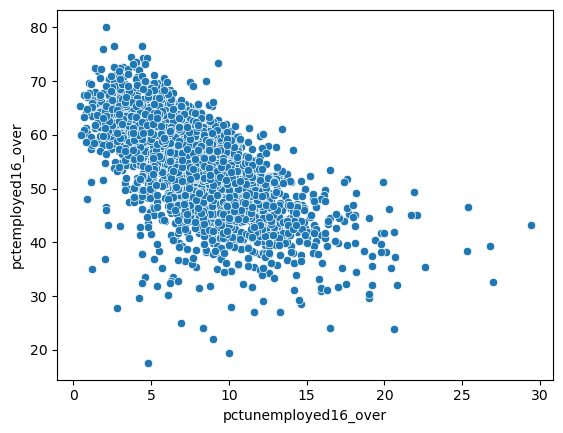

In [16]:
sns.scatterplot(x='pctunemployed16_over', y='pctemployed16_over', data=data_cancer.dropna());

In [17]:
model = smf.ols(formula='pctemployed16_over ~ pctunemployed16_over', data=data_cancer.dropna())
output = model.fit()
print(output.summary())

                            OLS Regression Results                            
Dep. Variable:     pctemployed16_over   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     2069.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        11:10:26   Log-Likelihood:                -9367.3
No. Observations:                2868   AIC:                         1.874e+04
Df Residuals:                    2866   BIC:                         1.875e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               66.4087 

In [18]:
data_cancer['pctemployed16_over'] = data_cancer['pctemployed16_over'].fillna(data_cancer['pctunemployed16_over']*(-1.5619) + 66.4087)

Based on the linear regression above, it seems that there is a linear relationship between employment rate and unemployment rate as one would expect. Thus, it seems appropriate to fill in missing employment rates by using this linear regression model and using the existing unemployment rate (since there are no missing values for unemployment rates) as the input. It is important to note that employment rate and unemployment rate do not necessarily add up to 1 because a person can be neither employed nor unemployed (e.g. students).

In [19]:
data_cancer

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,binnedinc,medianage,medianagemale,...,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctempprivcoverage,pctpubliccoverage,County,State,Region
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,"(61494.5, 125635]",39.3,36.9,...,23.2,19.6,51.90000,8.0,75.1,41.6,32.9,Kitsap County,Washington,West
1,173.000000,70,161.3,411.600000,48127,43269,18.6,"(48021.6, 51046.4]",33.0,32.2,...,26.0,22.7,55.90000,7.8,70.2,43.6,31.1,Kittitas County,Washington,West
2,102.000000,50,174.7,349.700000,49348,21026,14.6,"(48021.6, 51046.4]",45.0,44.0,...,29.0,16.0,45.90000,7.0,63.7,34.9,42.1,Klickitat County,Washington,West
3,427.000000,202,194.8,430.400000,44243,75882,17.1,"(42724.4, 45201]",42.8,42.2,...,31.6,9.3,48.30000,12.1,58.4,35.0,45.3,Lewis County,Washington,West
4,57.000000,26,144.4,350.100000,49955,10321,12.5,"(48021.6, 51046.4]",48.3,47.8,...,33.4,15.0,48.20000,4.8,61.6,35.1,44.0,Lincoln County,Washington,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,"(45201, 48021.6]",44.2,41.1,...,32.2,15.2,51.70000,4.3,78.3,44.6,31.7,Ellsworth County,Kansas,Mid West
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,"(48021.6, 51046.4]",30.4,29.3,...,23.1,12.4,70.10000,4.6,64.5,48.6,28.8,Finney County,Kansas,Mid West
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,"(51046.4, 54545.6]",30.9,30.5,...,23.0,12.8,64.80000,6.4,62.0,47.8,26.6,Ford County,Kansas,Mid West
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,"(48021.6, 51046.4]",39.0,36.9,...,36.1,14.4,55.63159,6.9,75.9,49.6,29.5,Franklin County,Kansas,Mid West


In [20]:
data_cancer.columns = ['avganncount', 'avgdeathsperyear', 'Death Rate', 'Incidence Rate',
       'Median Income', 'popest2015', 'Poverty Percent', 'binnedinc', 'medianage',
       'medianagemale', 'medianagefemale', 'geography', 'pcths25_over',
       'pctbachdeg25_over', 'pctemployed16_over', 'pctunemployed16_over',
       'Percent Private Coverage', 'Percentt Emp Private Coverage', 'Percent Public Coverage',
       'County', 'State', 'Region']

In [21]:
data_cancer['pctemployed16_over'].isna().any()

False

In [22]:
data_cancer

,avganncount,avgdeathsperyear,Death Rate,Incidence Rate,Median Income,popest2015,Poverty Percent,binnedinc,medianage,medianagemale,...,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,Percent Private Coverage,Percentt Emp Private Coverage,Percent Public Coverage,County,State,Region
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,"(61494.5, 125635]",39.3,36.9,...,23.2,19.6,51.90000,8.0,75.1,41.6,32.9,Kitsap County,Washington,West
1,173.000000,70,161.3,411.600000,48127,43269,18.6,"(48021.6, 51046.4]",33.0,32.2,...,26.0,22.7,55.90000,7.8,70.2,43.6,31.1,Kittitas County,Washington,West
2,102.000000,50,174.7,349.700000,49348,21026,14.6,"(48021.6, 51046.4]",45.0,44.0,...,29.0,16.0,45.90000,7.0,63.7,34.9,42.1,Klickitat County,Washington,West
3,427.000000,202,194.8,430.400000,44243,75882,17.1,"(42724.4, 45201]",42.8,42.2,...,31.6,9.3,48.30000,12.1,58.4,35.0,45.3,Lewis County,Washington,West
4,57.000000,26,144.4,350.100000,49955,10321,12.5,"(48021.6, 51046.4]",48.3,47.8,...,33.4,15.0,48.20000,4.8,61.6,35.1,44.0,Lincoln County,Washington,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,"(45201, 48021.6]",44.2,41.1,...,32.2,15.2,51.70000,4.3,78.3,44.6,31.7,Ellsworth County,Kansas,Mid West
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,"(48021.6, 51046.4]",30.4,29.3,...,23.1,12.4,70.10000,4.6,64.5,48.6,28.8,Finney County,Kansas,Mid West
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,"(51046.4, 54545.6]",30.9,30.5,...,23.0,12.8,64.80000,6.4,62.0,47.8,26.6,Ford County,Kansas,Mid West
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,"(48021.6, 51046.4]",39.0,36.9,...,36.1,14.4,55.63159,6.9,75.9,49.6,29.5,Franklin County,Kansas,Mid West


We now have our cleaned dataset.

# Data Analysis & Results (EDA)

We will now carry out our Data Analysis and EDA. 

Below is a pairplot that shows the relationship between cancer incidence rate and cancer death rate. Here we can roughly see the relationships between the our variables. The pairplot also shows the distinction between the 5 different regions we chose.

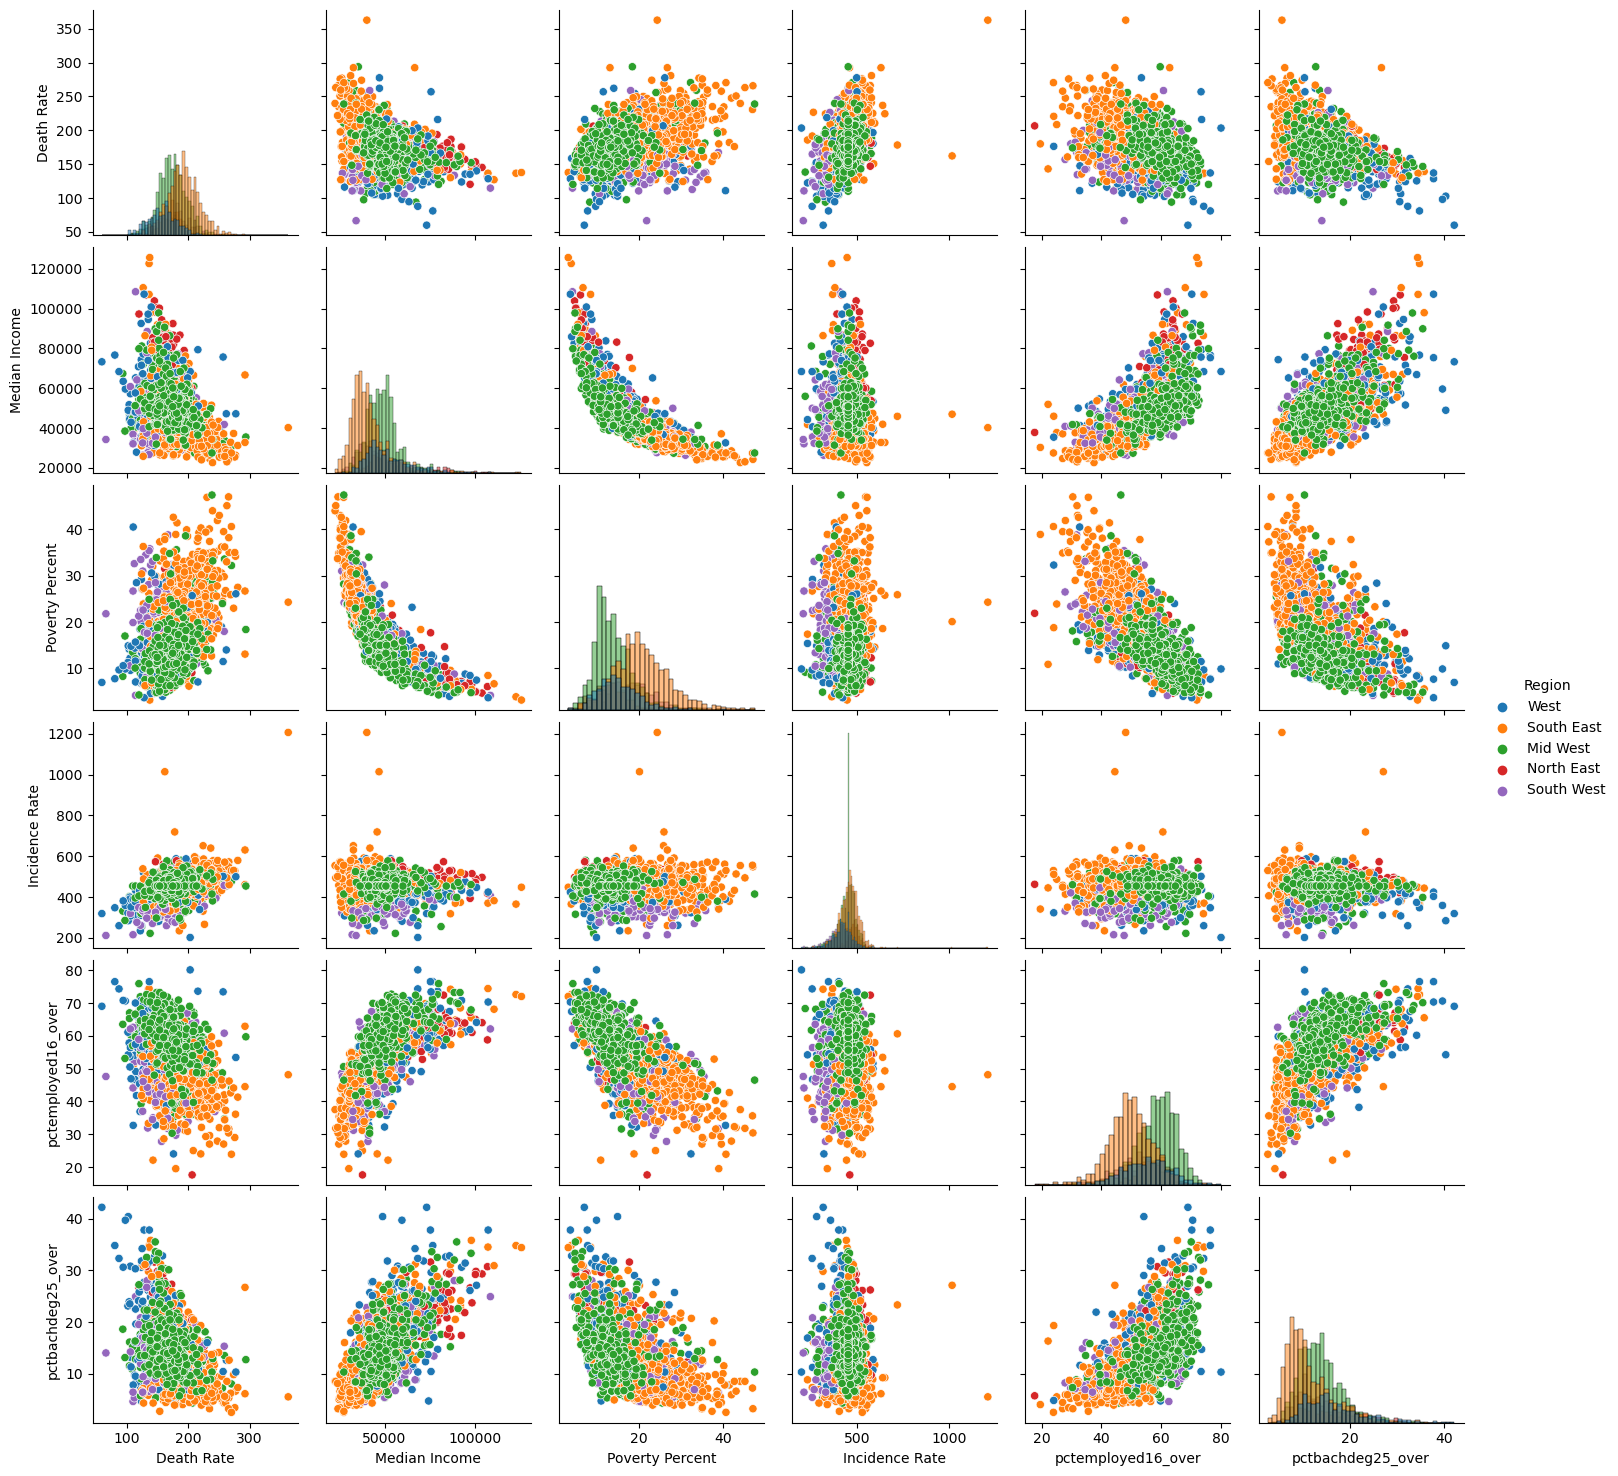

In [23]:
df = data_cancer[['Region', 'Death Rate', 'Median Income', 'Poverty Percent', 'Incidence Rate', 'pctemployed16_over', 'pctbachdeg25_over']]
sns.pairplot(df, hue='Region', diag_kind='hist')

Looking at the plots with cancer incidence rate on the y-axis, each plot seems to be flat, suggesting that there is not a strong relationship between cancer incidence rate and any of our variables: median income, poverty percent, employment, and education. This also hold true when looking at each region individually in these plots.

Looking at the plots with cancer death rate on the y-axis is a little more interesting. We can see a negative trend for employment and education, suggesting that there may be a negative relationship between employment and cancer death rates, as well as education and cancer death rates. The same holds true for median income and cancer death rates, though the relationship does not seem nearly as strong. Looking at poverty percent vs cancer death rate, there is a visible positive relationship between the two, suggesting that lower poverty rates may be correlated with lower cancer death rates. 

When we calculate the correlation coefficients, we will expect these variables to have a negative coefficient with cancer death rates. These results make sense with our hypothesis, as they hint that a lower socioeconomic status is correlated with a higher cancer death rate.

Next, we'll look at a boxplot of the cancer death rates for each region. 

Text(0.5, 1.0, 'Cancer Death Rate Distributions By Region')

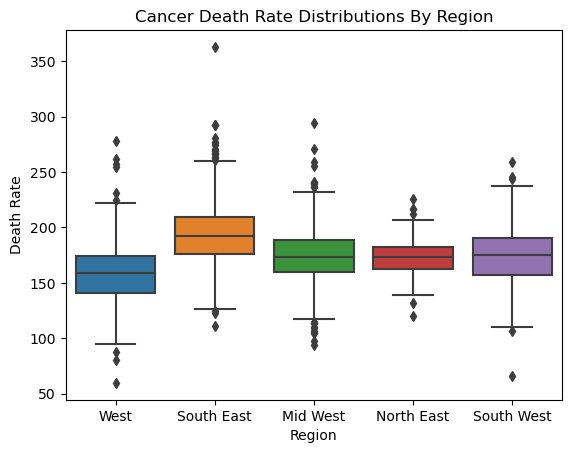

In [24]:
sns.boxplot(x='Region', y='Death Rate', data=df)
plt.title("Cancer Death Rate Distributions By Region")

Text(0.5, 1.0, 'Cancer Incidence Rate Distributions By Region')

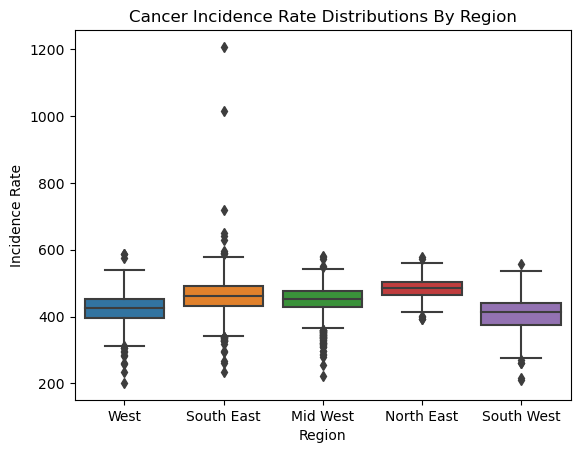

In [25]:
sns.boxplot(x='Region', y='Incidence Rate', data=df)
plt.title("Cancer Incidence Rate Distributions By Region")

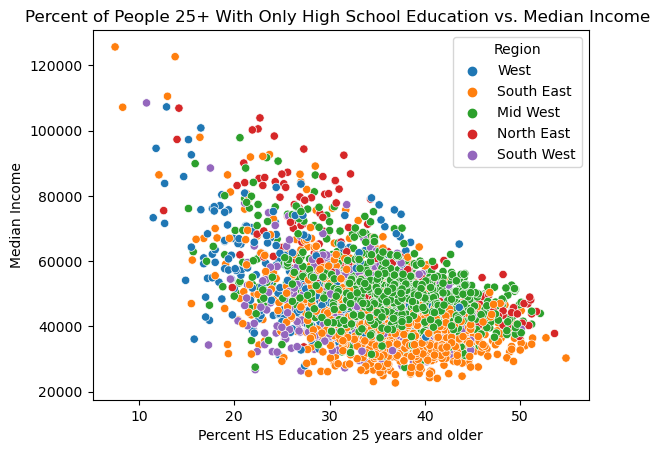

In [26]:
sns.scatterplot(x='pcths25_over', y='Median Income', hue='Region', data=data_cancer)
plt.title("Percent of People 25+ With Only High School Education vs. Median Income ");
plt.xlabel("Percent HS Education 25 years and older");

Now, we will look at health coverage and death rate. Below are two scatterplots, one with the percentage of people with *private* coverage vs the cancer death rate, and the other with the percentage of people with *public* coverage vs the cancer death rate. Note that one could have both private and public coverage, or neither of them, so they are not mutually exclusive. From our hypothesis, we would expect that having private health insurance coverage would be correlated with a lower cancer death rate.

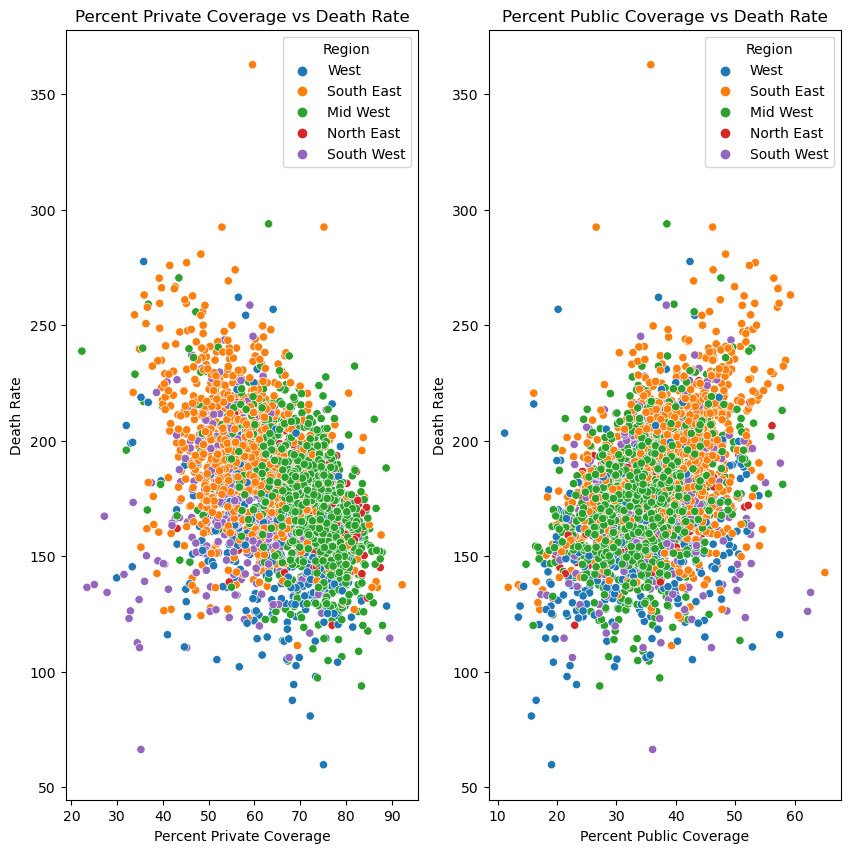

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
sns.scatterplot(x='Percent Private Coverage', y='Death Rate', hue='Region', data=data_cancer, ax=ax1);
sns.scatterplot(x='Percent Public Coverage', y='Death Rate', hue='Region', data=data_cancer, ax=ax2);
ax1.set_title("Percent Private Coverage vs Death Rate"); # Completed with help of CoPilot
ax2.set_title("Percent Public Coverage vs Death Rate"); # Completed with help of CoPilot

As expected, the scatterplot on the left suggests a *strong* negative relationship between percent private coverage and death rate exists, and this holds for all 5 regions. 

The scatterplot on the right suggests a *strong* positive relationship between percent public coverage and death rate, also for all 5 regions. This makes sense, as while they are not mutually exclusive, we can see from the scatterplot below that private and public health coverage seem to have a strong negative correlation. Intuitively, this means that counties with a higher population with public coverage will likely have a lower population with private coverage, and likely a higher cancer death rate.

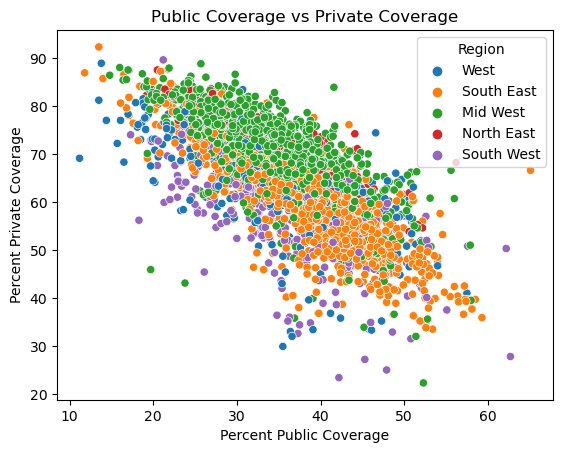

In [32]:
sns.scatterplot(x='Percent Public Coverage', y='Percent Private Coverage', hue='Region', data=data_cancer)
plt.title("Public Coverage vs Private Coverage");

A strong negative relationship between private coverage and cancer death rates would bode well for our hypothesis. This is because we can expect populations with a higher socioeconomic status would have better access to private health coverage, and we expect private health coverage to be more efficient than public coverage. From the scatterplots below, we see that this is true, as there seems to be a strong positive relationship between median income and private health coverage, as well as a strong negative relationship between median income and public health coverage.

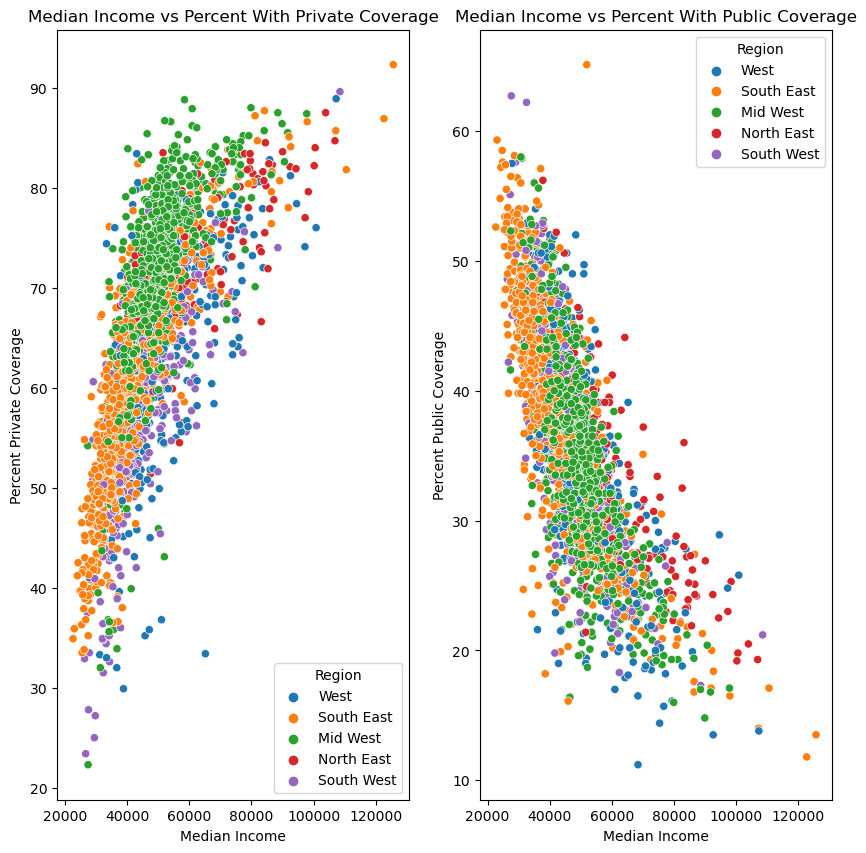

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
sns.scatterplot(x='Median Income', y='Percent Private Coverage', hue='Region', data=data_cancer, ax=ax1)
sns.scatterplot(x='Median Income', y='Percent Public Coverage', hue='Region', data=data_cancer, ax=ax2)
ax1.set_title("Median Income vs Percent With Private Coverage"); # Completed with help of CoPilot
ax2.set_title("Median Income vs Percent With Public Coverage"); # Completed with help of CoPilot